In [ ]:
'''
This data set consists of the marks secured by the students in various subjects.
We want to understand the influence of the parents background, test preparation etc. on students performance
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sb

In [ ]:
from google.colab import files
uploaded= files.upload()

import io
perf= pd.read_csv(io.BytesIO(uploaded['StudentsPerformance.csv']))

Preprocessing

In [ ]:
perf.shape

In [3]:
perf.rename(columns= {'race/ethnicity': 'race', 'parental level of education': 'parent_edu', 'test preparation course': 'prep_course',
                      'math score': 'math', 'reading score': 'reading', 'writing score': 'writing'}, inplace= True)

In [ ]:
perf.head(5)

,gender,race,parent_edu,lunch,prep_course,math,reading,writing,Batch
0,female,group B,bachelor's degree,standard,none,72,72,74,B
1,female,group C,some college,standard,completed,69,90,88,B
2,female,group B,master's degree,standard,none,90,95,93,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,C
4,male,group C,some college,standard,none,76,78,75,A


In [ ]:
perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   math                1000 non-null   float64
 1   reading             1000 non-null   float64
 2   writing             1000 non-null   float64
 3   female              1000 non-null   uint8  
 4   male                1000 non-null   uint8  
 5   associate's degree  1000 non-null   uint8  
 6   bachelor's degree   1000 non-null   uint8  
 7   high school         1000 non-null   uint8  
 8   master's degree     1000 non-null   uint8  
 9   some college        1000 non-null   uint8  
 10  some high school    1000 non-null   uint8  
 11  free/reduced        1000 non-null   uint8  
 12  standard            1000 non-null   uint8  
 13  completed           1000 non-null   uint8  
 14  none                1000 non-null   uint8  
 15  group A             1000 non-null   uint8  
 16  group B

In [ ]:
perf['gender'].value_counts()

In [ ]:
perf['race'].value_counts()

In [ ]:
perf['parent_edu'].value_counts()

In [ ]:
perf['lunch'].value_counts()

In [ ]:
perf['prep_course'].value_counts()

In [ ]:
perf['math'].value_counts()

In [ ]:
perf['reading'].value_counts()

In [ ]:
perf['writing'].value_counts()

In [ ]:
import sklearn as preprocessing
perf.describe()

#it seems there is no need for normalization or detecting outliers.

In [ ]:
perf.isnull().sum()
#no missing value

Visualize

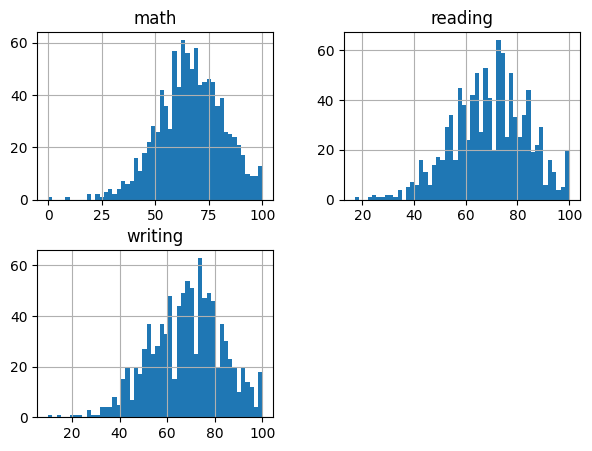

In [ ]:
perf.hist(bins=50, figsize=(7, 5))
plt.show()

In [ ]:
num_var= perf.drop([], axis= 1)
corr= num_var.corr()
sb.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, vmin= -1, vmax= +1)
plt.show()

In [ ]:
#We use PairPlot to get good insight of numerical values against each other:
sb.pairplot(perf, hue= 'gender', palette= 'hls', plot_kws= {'s': 80})

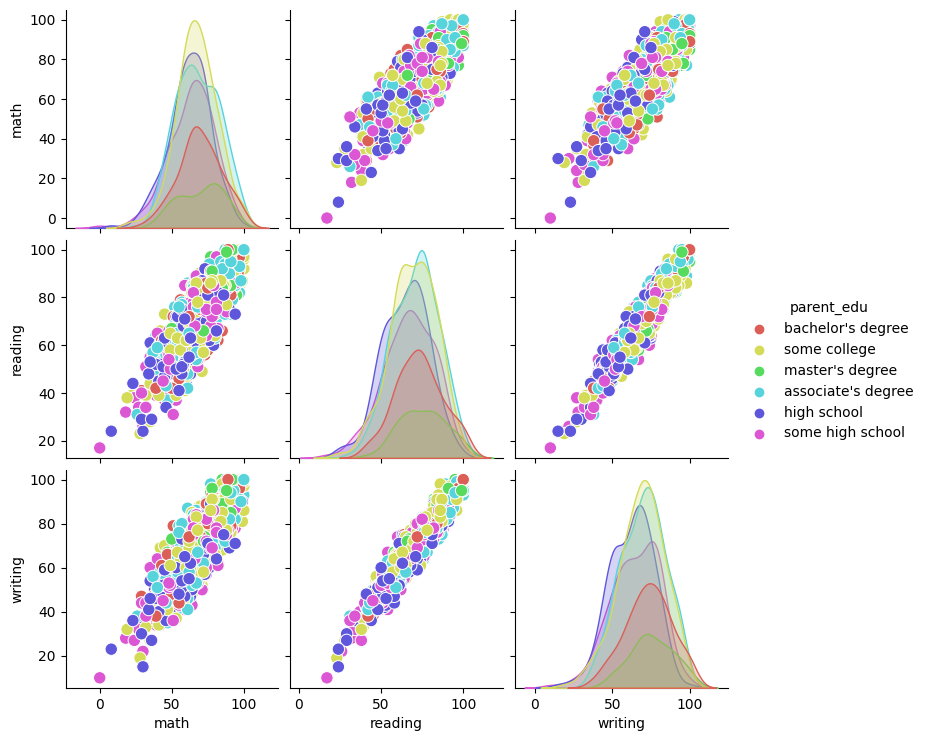

In [ ]:
sb.pairplot(perf, hue= 'parent_edu', palette= 'hls', plot_kws= {'s': 80})

In [20]:
#perf['categoricals']= ['gender', 'race', 'parent_edu', 'lunch', 'prep_course']
categorical_features= perf.select_dtypes(include= ['object']).columns
for feature in categorical_features:
  count= perf.feature.value_counts()
  category= count.index

plt.subplot()

In [ ]:
fig= px.bar(perf, x= 'Vehicle_Type',
             y='Historical_Cost_of_Ride',
             title='Historical Cost of Ride Distribution by Vehicle Type')
fig.show()

In [ ]:
count= perf.gender.value_counts()
category= count.index
plt.bar(category, count, color= ['darkorange', 'black'])
plt.xlabel('gender')
plt.ylabel('How Many')
plt.yticks([10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
plt.show()

In [ ]:
count= perf.race.value_counts()
category= count.index
plt.bar(category, count, color= ['aqua', 'violet', 'yellow', 'pink', 'green'])
plt.xlabel('race/ethnicity')
plt.ylabel('How Many')
plt.yticks([10, 50, 100, 150, 200, 250, 300])
plt.show()

In [ ]:
count= perf.parent_edu.value_counts()
category= count.index
plt.bar(category, count, color= ['aqua', 'violet', 'yellow', 'pink', 'green', 'orange'])
plt.xlabel('parental level of education')
plt.ylabel('How Many')
plt.yticks([10, 50, 100, 150, 200, 250, 300])
plt.show()

In [ ]:
count= perf.lunch.value_counts()
category= count.index
plt.bar(category, count, color= ['c', 'pink'])
plt.xlabel('lunch')
plt.ylabel('How Many')
plt.yticks([10, 50, 100, 150, 200, 250, 300])
plt.show()

In [ ]:
count= perf.prep_course.value_counts()
category= count.index
plt.bar(category, count, color= ['c', 'pink'])
plt.xlabel('test preparation course')
plt.ylabel('How Many')
plt.yticks([10, 50, 100, 150, 200, 250, 300])
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(perf, x= "parent_edu", y= "math", size= "math", color= "parent_edu")
fig.show()

#the output shows that parents with master's degree and associate's degree had better influence on their children! The range of scores shows that the std is smaller that the other gropus.

In [ ]:
fig = px.scatter(perf, x= "gender", y= "math", size= "math", color= "gender")
fig.show()

#the output shows that men/boys did better.

In [ ]:
fig = px.scatter(perf, x= "lunch", y= "math", size= "math", color= "lunch")
fig.show()

#the output shows that lunch does not affect much on scores.

In [ ]:
fig = px.scatter(perf, x= "prep_course", y= "math", size= "math", color= "prep_course")
fig.show()

#the output shows that completed preparation test has a good influence on scores.

In [ ]:
fig = px.scatter(perf, x= "race", y= "math", size= "math", color= "race")
fig.show()

#the output shows that group A did better.

Finding the relationship (using Regression)

In [4]:
#first, we turn the categorical values into numerical ones:

perf["gender"]= perf["gender"].replace({"female": 1, "male": 0})
perf["parent_edu"]= perf["parent_edu"].replace({"bachelor's degree": 0, "some college": 1, "master's degree": 2, "associate's degree": 3, "high school": 4, "some high school": 5})
perf["lunch"]= perf["lunch"].replace({"standard": 0, "free/reduced": 1})
perf["prep_course"]= perf["prep_course"].replace({"completed": 1, "none": 0})
perf["race"]= perf["race"].replace({"group A": 0, "group B": 1, "group C": 2, "group D": 3, "group E": 4})

perf

,gender,race,parent_edu,lunch,prep_course,math,reading,writing
0,1,1,0,0,0,72,72,74
1,1,2,1,0,1,69,90,88
2,1,1,2,0,0,90,95,93
3,0,0,3,1,0,47,57,44
4,0,2,1,0,0,76,78,75
...,...,...,...,...,...,...,...,...
995,1,4,2,0,1,88,99,95
996,0,2,4,1,0,62,55,55
997,1,2,4,1,1,59,71,65
998,1,3,1,0,1,68,78,77


In [5]:
#Standardization of numerical values (for better accuracy):

from sklearn.preprocessing import StandardScaler

numericals= ['math', 'reading', 'writing']
scaler= StandardScaler()
scaler.fit(perf[numericals])
perf[numericals]= scaler.transform(perf[numericals])

Train & Test (we use math score as target here, but we can do these steps for reading and writing scores too)

In [6]:
from sklearn.model_selection import train_test_split

X= perf.drop(['math', 'reading', 'writing'], axis= 1)
y= perf['math']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

LinearRegression

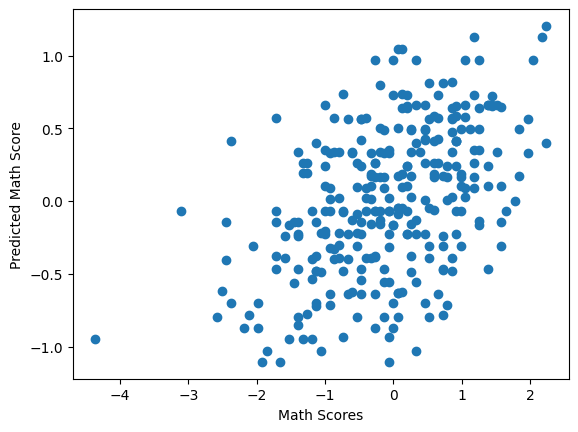

In [7]:
from sklearn.linear_model import LinearRegression

reg= LinearRegression()
reg.fit(X_train, y_train)
y_pred= reg.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Math Scores')
plt.ylabel('Predicted Math Score')
plt.show()

Accuracy of LinearRegression

In [8]:
from sklearn.metrics import mean_squared_error
regression_score= mean_squared_error(y_test, y_pred)
regression_score

0.8459406793153008

Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha= 0.1)

from sklearn.linear_model import Ridge
ridge= Ridge(alpha= 0.1)
ridge.fit(X_train, y_train)
ridge_pred= ridge.predict(X_test)

plt.scatter(y_test, ridge_pred)
plt.xlabel('Math Scores')
plt.ylabel('Predicted Math Score')
plt.show()

In [10]:
lasso_score= mean_squared_error(y_test, ridge_pred)
lasso_score

0.8459275043399973

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

dtr= DecisionTreeRegressor(max_depth= 3, max_features= 5, min_samples_leaf= 1)
dtr.fit(X_train, y_train)
dtr_pred= dtr.predict(X_test)

mse= mean_squared_error(y_test, dtr_pred)
mse

0.956290430907452

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

randint(1, 9).rvs(3)

params= {'max_depth': [None, 3], 'max_features': randint(1, 9), 'min_samples_leaf': randint(1, 9)}
dtr_cv= RandomizedSearchCV(dtr, params, cv= 5)
dtr_cv.fit(X_train, y_train)
print(dtr_cv.best_params_)

#we use these hyperparameters in above cell to calculate the mse

{'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 1}


RandomForestRegressor and Hyperparameter tuning

In [12]:
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(n_estimators= 100, max_depth= 3)
rfr.fit(X_train, y_train)
rfr_pred= rfr.predict(X_test)

rfr_mse= mean_squared_error(y_test, rfr_pred)
rfr_mse

0.8910290289759369

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid= {'n_neighbors': np.arange(1, 50)}
rfr_cv= GridSearchCV(rfr, param_grid, cv= 5, scoring= 'accuracy')
rfr.fit(X_train, y_train)
print(rfr_cv.best_params_)

In [14]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(X_train, y_train)
svr_pred= svr.predict(X_test)

In [15]:
from sklearn.ensemble import VotingRegressor
vc= VotingRegressor(estimators= [('reg', reg), ('ridge', ridge), ('dtr', dtr), ('rfr', rfr), ('svr', svr)])
vc.fit(X_train, y_train)
vc_pred= vc.predict(X_test)

vc_mse= mean_squared_error(y_test, vc_pred)
vc_mse

0.8726543032329056